In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline
%config Completer.use_jedi=False

In [2]:
import statsmodels.formula.api as sm  # For building the Model
import scipy.stats as stats

In [3]:
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

<Figure size 720x540 with 0 Axes>

In [4]:
from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [5]:
data = pd.read_csv(r"E:\DSP\DSP_22nd Nov\Machine Learning\Logistic Regression\2. HR Analytics - Predicting employee Attrition\HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
#### All the variables are having macthed data types .

### DATA PREPARATION - STEP 1

#### Segregating the data into Continuous and Categorical data set

In [9]:
num_var_names = [i for i in dict(data.dtypes) if dict(data.dtypes)[i] in ["int64","float64"]]
cat_var_names = [i for i in dict(data.dtypes) if dict(data.dtypes)[i] in ["object"]]
num_var_names

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [10]:
cat_var_names

['department', 'salary']

In [11]:
data_num = data[num_var_names]
data_cat = data[cat_var_names]
data_num

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
5,0.41,0.50,2,153,3,0,1,0
6,0.10,0.77,6,247,4,0,1,0
7,0.92,0.85,5,259,5,0,1,0
8,0.89,1.00,5,224,5,0,1,0
9,0.42,0.53,2,142,3,0,1,0


In [12]:
data_cat

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
5,sales,low
6,sales,low
7,sales,low
8,sales,low
9,sales,low


In [13]:
# Creating Data Audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary = data_num.apply(lambda x: var_summary(x)).T

In [14]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
satisfaction_level,14999.0,0.0,9191.89,0.612834,0.64,0.248631,0.061817,0.09,0.09,0.11,0.21,0.44,0.64,0.82,0.92,0.96,0.99,1.0
last_evaluation,14999.0,0.0,10740.81,0.716102,0.72,0.171169,0.029299,0.36,0.39,0.46,0.49,0.56,0.72,0.87,0.95,0.98,1.00,1.0
number_project,14999.0,0.0,57042.00,3.803054,4.00,1.232592,1.519284,2.00,2.00,2.00,2.00,3.00,4.00,5.00,5.00,6.00,7.00,7.0
average_montly_hours,14999.0,0.0,3015554.00,201.050337,200.00,49.943099,2494.313175,96.00,104.00,130.00,137.00,156.00,200.00,245.00,267.00,275.00,301.00,310.0
time_spend_company,14999.0,0.0,52470.00,3.498233,3.00,1.460136,2.131998,2.00,2.00,2.00,2.00,3.00,3.00,4.00,5.00,6.00,10.00,10.0
Work_accident,14999.0,0.0,2169.00,0.144610,0.00,0.351719,0.123706,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.0
left,14999.0,0.0,3571.00,0.238083,0.00,0.425924,0.181411,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.0
promotion_last_5years,14999.0,0.0,319.00,0.021268,0.00,0.144281,0.020817,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.0


In [15]:
num_summary = num_summary.round(2)

In [16]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in data_cat.columns:
    data_cat[c_feature] = data_cat[c_feature].astype('category')
    data_cat = create_dummies(data_cat , c_feature )

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
salary_low                14999 non-null uint8
salary_medium             14999 non-null uint8
dtypes: uint8(11)
memory usage: 161.2 KB


In [18]:
# 0. How many records of people leaving the company exist in the dataset?
data_left = pd.DataFrame( data.left.value_counts() )
data_left

,left
0,11428
1,3571


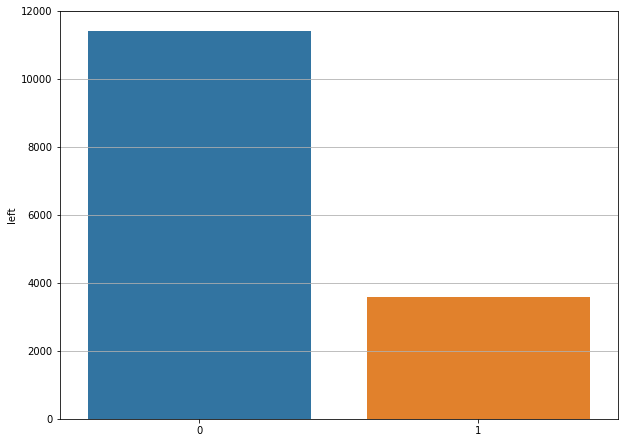

In [19]:
sns.barplot(data_left.index,data_left.left)

In [20]:
# 1. What is the percentage of churn by salary bucket 

In [21]:
salary_count = data[['salary', 'left']].groupby(['salary', 'left']).size().reset_index()
salary_count.columns = ['salary', 'left', 'count']

In [22]:
salary_count

,salary,left,count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129
5,medium,1,1317


In [23]:
salary_count = data[['salary', 'left']].groupby(['salary', 'left']).size()
salary_percent = salary_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()

In [24]:
salary_percent

,salary,left,0
0,high,0,0.933711
1,high,1,0.066289
2,low,0,0.703116
3,low,1,0.296884
4,medium,0,0.795687
5,medium,1,0.204313


C:\Users\Akhtar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Akhtar\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


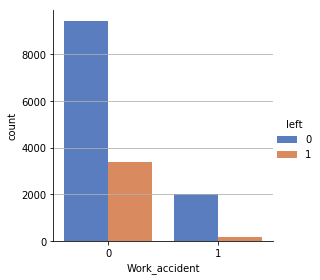

In [25]:
# 2. How many people, who had work accidents, actually left the company?
work_accident_count = data[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size().reset_index()
work_accident_count.columns = ['Work_accident', 'left', 'count']

sns.factorplot(x="Work_accident", y = 'count', hue="left", data=work_accident_count,
               size=4, kind="bar", palette="muted")

C:\Users\Akhtar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


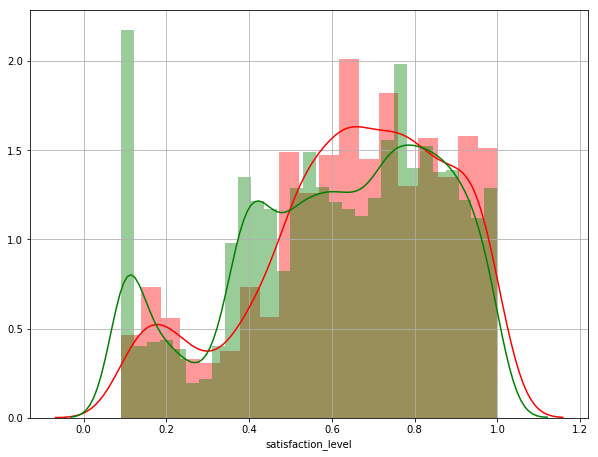

In [26]:
#3. How work accidents have impacted the statisfactin level of the empolyees?
sns.distplot( data[data.Work_accident == 1]['satisfaction_level'], color = 'r')
sns.distplot( data[data.Work_accident == 0]['satisfaction_level'], color = 'g')

### Handling Outliers

In [27]:
def outlier_cap(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x


In [28]:
data_num = data_num.apply(lambda x : outlier_cap(x))

In [29]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null float64
average_montly_hours     14999 non-null float64
time_spend_company       14999 non-null float64
Work_accident            14999 non-null float64
left                     14999 non-null float64
promotion_last_5years    14999 non-null float64
dtypes: float64(8)
memory usage: 937.5 KB


### Handling Missing Values

In [30]:
# Handling Missings for Continuous Variables
def missing_impute(x):
    x = x.fillna(x.median())
    return x
data_num = data_num.apply(lambda x : missing_impute(x))

In [31]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null float64
average_montly_hours     14999 non-null float64
time_spend_company       14999 non-null float64
Work_accident            14999 non-null float64
left                     14999 non-null float64
promotion_last_5years    14999 non-null float64
dtypes: float64(8)
memory usage: 937.5 KB


#### Since , every  variable is having a good CV therefore, no need of Dropping any variables due to that reason.

In [32]:
data_cat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
salary_low                14999 non-null uint8
salary_medium             14999 non-null uint8
dtypes: uint8(11)
memory usage: 161.2 KB


#### Merging the two data sets into one to perform further Assumptions of Technique

In [33]:
data1 = pd.concat([data_num , data_cat],axis=1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
number_project            14999 non-null float64
average_montly_hours      14999 non-null float64
time_spend_company        14999 non-null float64
Work_accident             14999 non-null float64
left                      14999 non-null float64
promotion_last_5years     14999 non-null float64
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
salary_low                14999 non-null uint8
salary_medium             149

### Assumptions of Logistic Regression
### Log(Y) and X should have Linear Relationship.
### Its Theoretically proven that Log(Y) follows a Normal Distribution , so we dont need to prove that

In [35]:
corr_matrix = data1.corr()

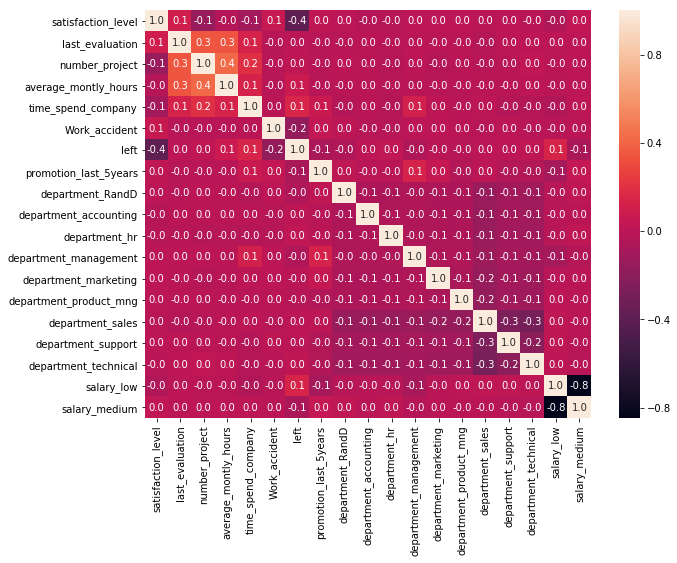

In [36]:
sns.heatmap(corr_matrix,fmt = "1.1f",annot=True)

### Data Exploratory Analysis 
### 1) Variable Transformation - Bucketing

In [37]:
data1.columns.difference(["left"])      # The independent variables / Features

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [38]:
bin1 = pd.cut(data1.Work_accident , 10 , labels=list(range(1,11)))
bin1

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18       10
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
14969     1
14970     1
14971     1
14972     1
14973     1
14974     1
14975     1
14976     1
14977     1
14978     1
14979     1
14980     1
14981     1
14982     1
14983     1
14984     1
14985     1
14986     1
14987     1
14988     1
14989    10
14990    10
14991     1
14992     1
14993     1
14994     1
14995     1
14996     1
14997     1
14998     1
Name: Work_accident, Length: 14999, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [39]:
data1.groupby(["Work_accident"])["left"].sum()  # Grouping by #0's and #1's where left == 1
# data1.Work_accident[data1.left == 1].value_counts()

Work_accident
0.0    3402.0
1.0     169.0
Name: left, dtype: float64

In [40]:
# data1.Work_accident.value_counts()


In [41]:
#data1.left.value_counts()
data1.left.count()

14999

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


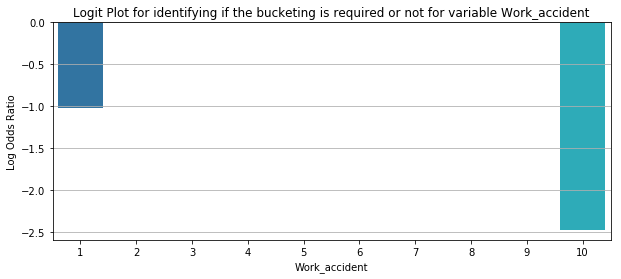

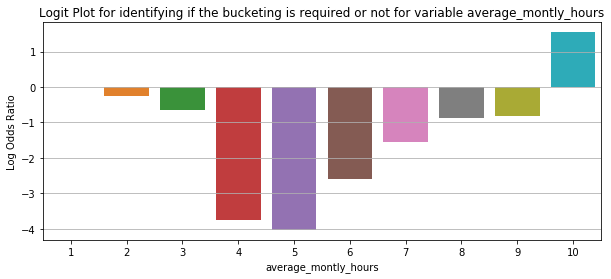

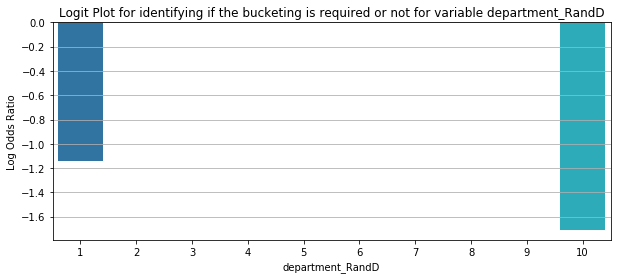

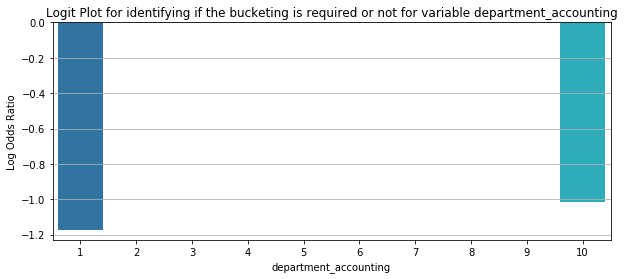

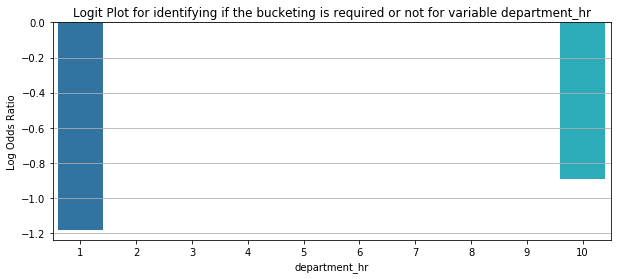

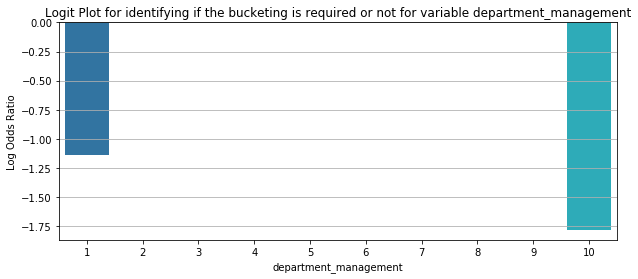

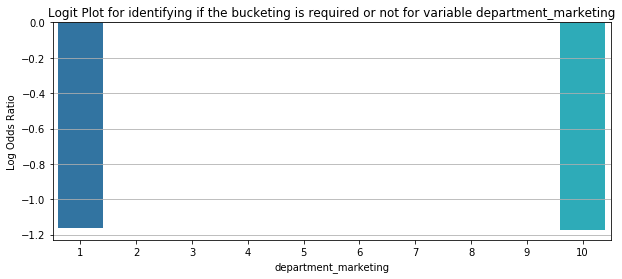

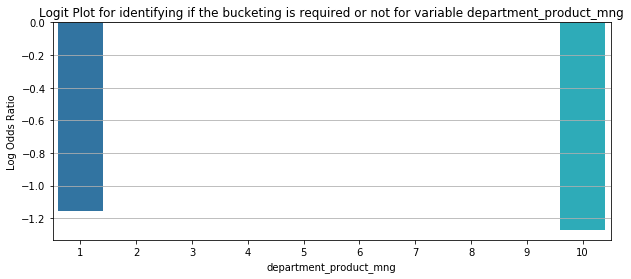

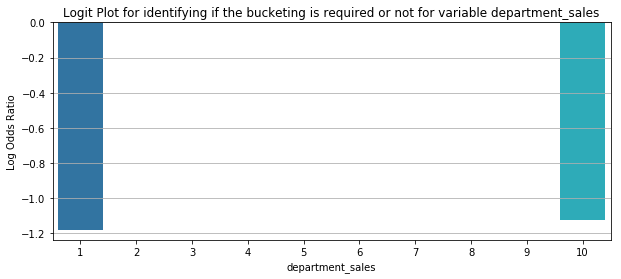

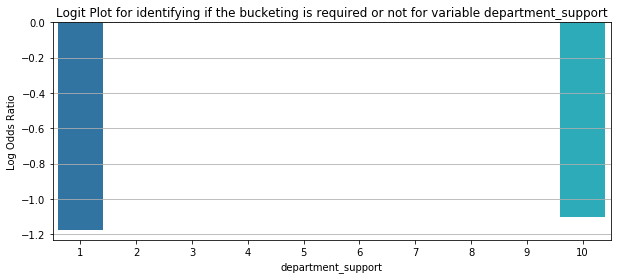

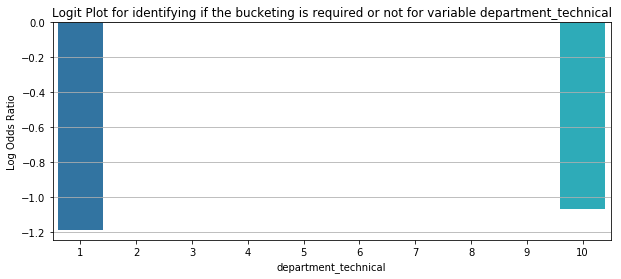

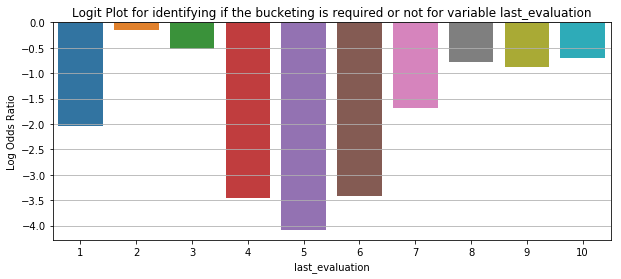

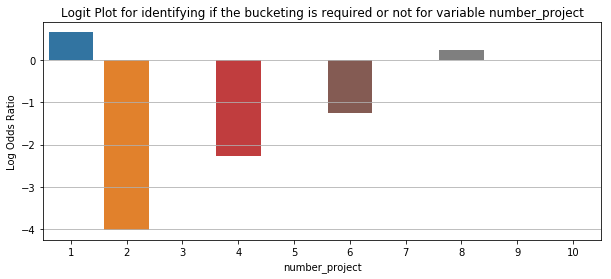

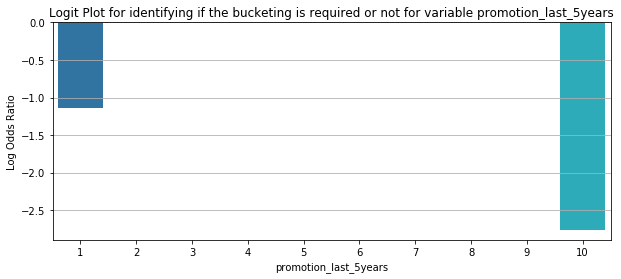

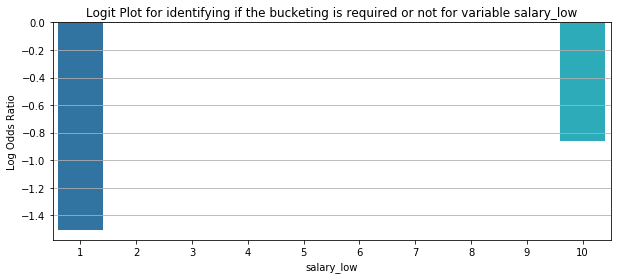

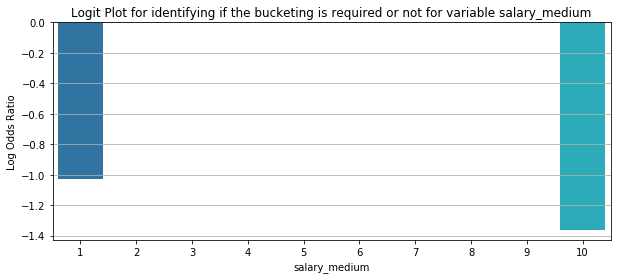

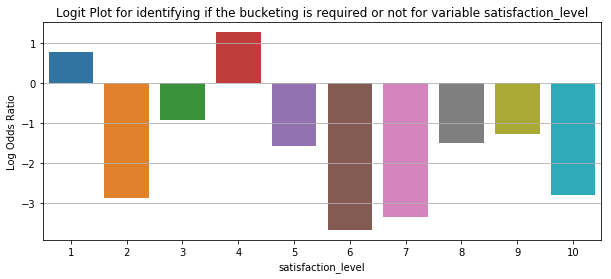

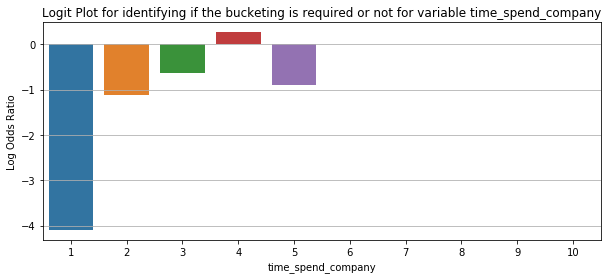

In [42]:
bp = PdfPages('Transformation Plots.pdf')

for num_variable in data1.columns.difference(['left']):
    binned = pd.cut(data1[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = data1.groupby([binned])['left'].sum() / (data1.groupby([binned])['left'].count() - data1.groupby([binned])['left'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)  # What log_odds.index is implying
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

In [43]:
log_odds.index

CategoricalIndex([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], categories=[1, 2, 3, 4, 5, 6, 7, 8, ...], ordered=True, name='time_spend_company', dtype='category')

#### All the above Tranformation PLots plotted as X : every variable & Y : Log odds ratio =>log(P(Y = 1)/P(Y = 0))

### 2) Variable Reduction Using Somer's D values (GINI) 

In [44]:
data1.columns.difference(["left"])

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [45]:
# statsmodels.formula.api as sm
logreg_model = sm.logit('left~Work_accident' , data = data1).fit() # We are calculating Somers D for a single variable here.
# First , fitting the model
# Second , predicting values for Model
# Third , Calculating roc_auc_score using metrics of sklearn 
# Fourth , Finally calculating Somers D using 2*AUC-1

Optimization terminated successfully.
         Current function value: 0.534317
         Iterations 6


In [46]:
pred = logreg_model.predict(data1)   # Predicting for Model

In [47]:
metrics.roc_auc_score(data1["left"],pred)    # Area under the Curve value ,Should be high 
# The curve known as ROC curve comes when the graph is plotted between (1 - Specificity) on X-axis & Sensitivity on Y-axis

0.5638415356780161

In [48]:
(2 * metrics.roc_auc_score(data1["left"],pred)) - 1  # Somerce D = 2 * AUC - 1

0.12768307135603219

In [49]:
somersd_df = pd.DataFrame()

for num_variable in data1.columns.difference(['left']):
    logreg = sm.logit(formula = str('left ~ ') + str(num_variable), data=data1)
    result = logreg.fit()
    #summ = result.summary2()
    y_score = pd.DataFrame(result.predict()) # Saving the predicted values in a dataframe y_score and giving its column name as Score
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(data1['left'],y_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    # temp = pd.DataFrame([num_variable,somers_d])  # Length mismatch: Expected axis has 1 elements, new values have 2 elements
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

somersd_df

Optimization terminated successfully.
         Current function value: 0.534317
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.546452
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547669
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.548747
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548478
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.547682
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.548859
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548798
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548811
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548803
  

,Variable Name,SomersD
0,Work_accident,0.127683
0,average_montly_hours,0.0629711
0,department_RandD,0.0243938
0,department_accounting,0.00786189
0,department_hr,0.0143549
0,department_management,0.0216818
0,department_marketing,0.000468544
0,department_product_mng,0.00615643
0,department_sales,0.0104154
0,department_support,0.00893633


In [50]:
# y_score 
temp  # Without Transposing the temp , the Variable name will come under a single column having two values

,Variable Name,SomersD
0,time_spend_company,0.346659


In [51]:
somersd_df.sort_values(by="SomersD" , ascending=False)

,Variable Name,SomersD
0,satisfaction_level,0.495877
0,time_spend_company,0.346659
0,salary_low,0.15811
0,Work_accident,0.127683
0,salary_medium,0.0800057
0,average_montly_hours,0.0629711
0,department_RandD,0.0243938
0,department_management,0.0216818
0,promotion_last_5years,0.0209307
0,department_technical,0.0181621


#### RFE is having issue 

In [52]:
data1.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project            float64
average_montly_hours      float64
time_spend_company        float64
Work_accident             float64
left                      float64
promotion_last_5years     float64
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
salary_low                  uint8
salary_medium               uint8
dtype: object

### Select KBest

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [54]:
X = data1[data1.columns.difference(['left'])]  # Independent variables
X_new = SelectKBest(f_classif, k=10).fit(X,data1[['left']])

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
X_new.get_support()

array([ True,  True,  True, False,  True,  True, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True])

In [56]:
X_new.scores_

array([3.67328044e+02, 7.24922738e+01, 3.26316555e+01, 3.46623246e+00,
       1.19770402e+01, 3.18499985e+01, 1.10738446e-02, 1.82448994e+00,
       1.47696013e+00, 1.71724102e+00, 6.04697792e+00, 5.55422265e-01,
       8.49055933e+00, 5.74745229e+01, 2.77227385e+02, 7.13937103e+01,
       2.66406498e+03, 3.21277313e+02])

In [57]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, X_new.get_support())]

feature_map

#Alternative of capturing the important variables
KBest_features=X.columns[X_new.get_support()]

selected_features_from_KBest = X[KBest_features]

In [58]:
KBest_features

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_hr', 'department_management', 'promotion_last_5years',
       'salary_low', 'salary_medium', 'satisfaction_level',
       'time_spend_company'],
      dtype='object')

####  Variance Inflation Factor assessment (VIF)

In [59]:
X = pd.concat([data1[data1.columns.difference(['left'])],data1['left']], axis=1)
X.head()

,Work_accident,average_montly_hours,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,last_evaluation,number_project,promotion_last_5years,salary_low,salary_medium,satisfaction_level,time_spend_company,left
0,0.0,157.0,0,0,0,0,0,0,1,0,0,0.53,2.0,0.0,1,0,0.38,3.0,1.0
1,0.0,262.0,0,0,0,0,0,0,1,0,0,0.86,5.0,0.0,0,1,0.80,6.0,1.0
2,0.0,272.0,0,0,0,0,0,0,1,0,0,0.88,7.0,0.0,0,1,0.11,4.0,1.0
3,0.0,223.0,0,0,0,0,0,0,1,0,0,0.87,5.0,0.0,1,0,0.72,5.0,1.0
4,0.0,159.0,0,0,0,0,0,0,1,0,0,0.52,2.0,0.0,1,0,0.37,3.0,1.0


In [60]:
data1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [61]:
list_vars = ['Work_accident' , 'average_montly_hours',  'last_evaluation', 'number_project', 'promotion_last_5years', 'salary_low', 'satisfaction_level','time_spend_company']

In [62]:
features = '+'.join(list_vars)

In [63]:
features

'Work_accident+average_montly_hours+last_evaluation+number_project+promotion_last_5years+salary_low+satisfaction_level+time_spend_company'

In [64]:
a,b = dmatrices(formula_like='left ~ ' + 'Work_accident+average_montly_hours+last_evaluation+number_project+promotion_last_5years+salary_low+satisfaction_level+time_spend_company' , data = X, return_type='dataframe')
# a,b is used : a to store dependent variable and b to store independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

# When included salary_medium , it gave VIF as 3.54 so excluded it

In [65]:
vif

,VIF Factor,features
0,37.213634,Intercept
1,1.005251,Work_accident
2,1.278551,average_montly_hours
3,1.241424,last_evaluation
4,1.352497,number_project
5,1.013832,promotion_last_5years
6,1.010890,salary_low
7,1.066301,satisfaction_level
8,1.062291,time_spend_company


In [66]:
a

,left
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [67]:
b

,Intercept,Work_accident,average_montly_hours,last_evaluation,number_project,promotion_last_5years,salary_low,satisfaction_level,time_spend_company
0,1.0,0.0,157.0,0.53,2.0,0.0,1.0,0.38,3.0
1,1.0,0.0,262.0,0.86,5.0,0.0,0.0,0.80,6.0
2,1.0,0.0,272.0,0.88,7.0,0.0,0.0,0.11,4.0
3,1.0,0.0,223.0,0.87,5.0,0.0,1.0,0.72,5.0
4,1.0,0.0,159.0,0.52,2.0,0.0,1.0,0.37,3.0
5,1.0,0.0,153.0,0.50,2.0,0.0,1.0,0.41,3.0
6,1.0,0.0,247.0,0.77,6.0,0.0,1.0,0.10,4.0
7,1.0,0.0,259.0,0.85,5.0,0.0,1.0,0.92,5.0
8,1.0,0.0,224.0,1.00,5.0,0.0,1.0,0.89,5.0
9,1.0,0.0,142.0,0.53,2.0,0.0,1.0,0.42,3.0


#### Splitting the data into Train and Test

In [68]:
train , test = train_test_split(data1 , test_size = 0.3 ,random_state = 42)

In [69]:
train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [70]:
print(len(train))
print(len(test))

10499
4500


### Building Logistic Regression

In [71]:
features

'Work_accident+average_montly_hours+last_evaluation+number_project+promotion_last_5years+salary_low+satisfaction_level+time_spend_company'

In [72]:
logreg = sm.logit(formula= 'left~Work_accident+average_montly_hours+last_evaluation+number_project+promotion_last_5years+salary_low+satisfaction_level+time_spend_company' , data=train)
result = logreg.fit()  # We build the Model only on the trained data.

Optimization terminated successfully.
         Current function value: 0.434571
         Iterations 7


In [73]:
print(result.summary2()) 

                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.208    
Dependent Variable:   left               AIC:                9143.1153
Date:                 2019-04-30 00:28   BIC:                9208.4466
No. Observations:     10499              Log-Likelihood:     -4562.6  
Df Model:             8                  LL-Null:            -5761.7  
Df Residuals:         10490              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       7.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Intercept             -0.2072   0.1449  -1.4299 0.1527 -0.4913  0.0768
Work_accident         -1.4840   0.1050 -14.1307 0.0000 -1.6898 -1.2782
average_montly_hours   0.0047   0.

In [74]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                10499
Model:                          Logit   Df Residuals:                    10490
Method:                           MLE   Df Model:                            8
Date:                Tue, 30 Apr 2019   Pseudo R-squ.:                  0.2081
Time:                        00:28:28   Log-Likelihood:                -4562.6
converged:                       True   LL-Null:                       -5761.7
                                        LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.2072      0.145     -1.430      0.153      -0.491       0.077
Work_accident            -1.4840      0.105    -14.131      0.000      -1.690      -1.278
average_

In [75]:
list_vars1 = ['Work_accident' , 'average_montly_hours',  'last_evaluation', 'number_project', 'promotion_last_5years', 'salary_low', 'satisfaction_level','time_spend_company','left']

In [76]:
model_corr = train[list_vars1]

In [77]:
model_corr = model_corr.corr()

In [79]:
model_corr

,Work_accident,average_montly_hours,last_evaluation,number_project,promotion_last_5years,salary_low,satisfaction_level,time_spend_company,left
Work_accident,1.000000,-0.006704,-0.006761,-0.004348,0.038828,-0.007598,0.062974,0.009368,-0.152874
average_montly_hours,-0.006704,1.000000,0.341249,0.414652,-0.000640,-0.002253,-0.027653,0.126987,0.077542
last_evaluation,-0.006761,0.341249,1.000000,0.345506,-0.002193,0.007624,0.102850,0.136847,0.007174
number_project,-0.004348,0.414652,0.345506,1.000000,-0.007513,0.006597,-0.143090,0.197720,0.034277
promotion_last_5years,0.038828,-0.000640,-0.002193,-0.007513,1.000000,-0.085491,0.025844,0.062734,-0.061557
salary_low,-0.007598,-0.002253,0.007624,0.006597,-0.085491,1.000000,-0.051211,-0.040867,0.134838
satisfaction_level,0.062974,-0.027653,0.102850,-0.143090,0.025844,-0.051211,1.000000,-0.098445,-0.396458
time_spend_company,0.009368,0.126987,0.136847,0.197720,0.062734,-0.040867,-0.098445,1.000000,0.141717
left,-0.152874,0.077542,0.007174,0.034277,-0.061557,0.134838,-0.396458,0.141717,1.000000


In [78]:
model_corr.to_csv("FinalModelcorr.csv")

In [302]:
pred_res_train = result.predict(train)

In [303]:
pred_res_test = result.predict(test)

In [304]:

train_gini = 2*metrics.roc_auc_score(train['left'], pred_res_train) - 1   # Somers D is always calculated using the predicted values.
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['left'], pred_res_test) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.6263694477791115
The Gini Index for the model built on the Test Data is :  0.6196250370086558


In [305]:
train_auc = metrics.roc_auc_score(train['left'], result.predict(train))
test_auc = metrics.roc_auc_score(test['left'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.8131847238895558
The AUC for the model built on the Test Data is :  0.8098125185043279


#### Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's

In [306]:
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['train_prob']
train_actual = train['left']

In [307]:
# making a DataFrame with actual and prob columns

train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['train_actual','train_prob']
train_predict.head()

,train_actual,train_prob
12602,1.0,0.664411
4889,0.0,0.033652
1572,1.0,0.504105
13375,0.0,0.041230
879,1.0,0.115837


In [308]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's

test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['test_prob']
test_actual = test['left']


In [309]:
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['test_actual','test_prob']
test_predict.head()

,test_actual,test_prob
6723,0.0,0.023797
6473,0.0,0.091275
4679,0.0,0.235997
862,1.0,0.481802
7286,0.0,0.019170


### DECIDING CUT-OFF for Probability values

In [310]:
np.linspace(0,1,50)          # The values are fixed for linspace even after executing number of times

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [311]:
train_predict.head()
#cut-off = 0.2

,train_actual,train_prob
12602,1.0,0.664411
4889,0.0,0.033652
1572,1.0,0.504105
13375,0.0,0.041230
879,1.0,0.115837


In [312]:
train_predict['predicted'] = train_predict['train_prob'].apply(lambda x: 0.0 if x < 0.2 else 1.0)
# Creating a new Column which will give only two values , either 0 or 1 based on the cut -off which we have assumed here = 0.2,
# not calculated)

In [313]:
train_predict.head()

,train_actual,train_prob,predicted
12602,1.0,0.664411,1.0
4889,0.0,0.033652,0.0
1572,1.0,0.504105,1.0
13375,0.0,0.041230,0.0
879,1.0,0.115837,0.0


In [314]:
train_predict['tp'] = train_predict.apply(lambda x: 1.0 if x['train_actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
train_predict['fp'] = train_predict.apply(lambda x: 1.0 if x['train_actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
train_predict['tn'] = train_predict.apply(lambda x: 1.0 if x['train_actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
train_predict['fn'] = train_predict.apply(lambda x: 1.0 if x['train_actual']==1.0 and x['predicted']==0 else 0.0, axis=1)

# Before starting the if condition , we are giving the output of True condition , ie. 1

In [315]:
train_predict.head(20)

,train_actual,train_prob,predicted,tp,fp,tn,fn
12602,1.0,0.664411,1.0,1.0,0.0,0.0,0.0
4889,0.0,0.033652,0.0,0.0,0.0,1.0,0.0
1572,1.0,0.504105,1.0,1.0,0.0,0.0,0.0
13375,0.0,0.041230,0.0,0.0,0.0,1.0,0.0
879,1.0,0.115837,0.0,0.0,0.0,0.0,1.0
1578,1.0,0.821366,1.0,1.0,0.0,0.0,0.0
8765,0.0,0.007724,0.0,0.0,0.0,1.0,0.0
1509,1.0,0.274188,1.0,1.0,0.0,0.0,0.0
1896,1.0,0.312415,1.0,1.0,0.0,0.0,0.0
4520,0.0,0.161788,0.0,0.0,0.0,1.0,0.0


In [316]:
accuracy = (train_predict.tp.sum()+train_predict.tn.sum())/(train_predict.tp.sum()+train_predict.tn.sum()+train_predict.fp.sum()+train_predict.fn.sum())

# Accuracy = (TP + TN) / Total

In [317]:
accuracy

0.7082579293266026

###  Intuition behind ROC curve - CONFUSION MATRIX for each different cut-off shows trade off in sensitivity and specificity

In [318]:

roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50): # Predicting cut-off based on 50 data points
    train_temp['cut_off'] = cut_off # Whatever values come , it is calculating further based on that value
    train_temp['train_predicted'] = train_temp['train_prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['train_actual']==1.0 and x['train_predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['train_actual']==0.0 and x['train_predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['train_actual']==0.0 and x['train_predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['train_actual']==1.0 and x['train_predicted']==0 else 0.0, axis=1)
    
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    # Sensitivity = TP / (TP + FN)
    
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    # Specificity = TN / (TN + FP)
    
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    # Accuracy = (TP + TN) / Total
    
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T # transposing the values
    
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)
    

In [319]:
roc_like_df

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.238023
0,0.020408,0.997999,0.054125,0.278788
0,0.040816,0.987995,0.143250,0.344319
0,0.061224,0.983593,0.241500,0.418135
0,0.081633,0.973990,0.333875,0.486237
0,0.102041,0.947979,0.412625,0.540051
0,0.122449,0.917567,0.482500,0.586056
0,0.142857,0.890356,0.547500,0.629108
0,0.163265,0.855142,0.600000,0.660730
0,0.183673,0.818727,0.646250,0.687304


#### Finding ideal cut-off for checking if this remains same in OOS validation

In [320]:
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [321]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.238023,1.000000
0,0.020408,0.997999,0.054125,0.278788,1.052124
0,0.040816,0.987995,0.143250,0.344319,1.131245
0,0.061224,0.983593,0.241500,0.418135,1.225093
0,0.081633,0.973990,0.333875,0.486237,1.307865


#### Cut-off based on highest sum(sensitivity+specificity)   - common way of identifying cut-off

In [322]:
roc_like_df[roc_like_df['total'] == roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.265306,0.727491,0.77525,0.763882,1.502741


#### Cut-off based on highest accuracy   - some teams use this as methodology to decide the cut-off

In [323]:
roc_like_df[roc_like_df['accuracy']==roc_like_df['accuracy'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.428571,0.4994,0.897625,0.802838,1.397025


In [324]:
#Cut-off based on highest sensitivity

roc_like_df[roc_like_df['sensitivity']==roc_like_df['sensitivity'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.0,1.0,0.0,0.238023,1.0


### Choosen Best Cut-off is 0.27 based on highest (sensitivity+specicity)

In [336]:
test_predict['predicted'] = test_predict['test_prob'].apply(lambda x: 1 if x > 0.27 else 0)
train_predict['predicted'] = train_predict['train_prob'].apply(lambda x: 1 if x > 0.27 else 0)

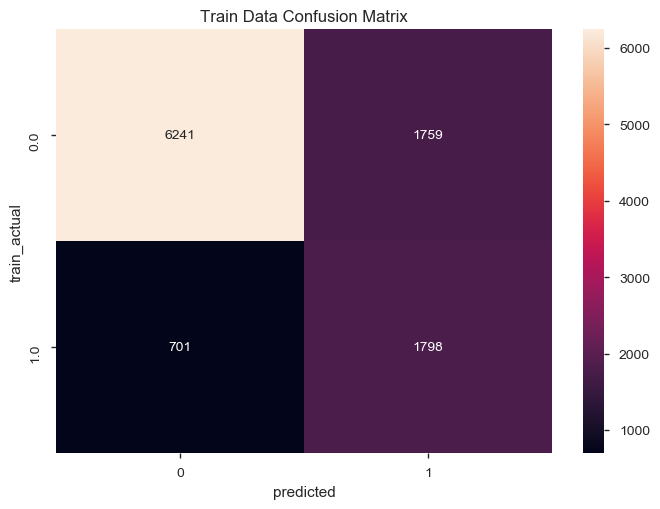

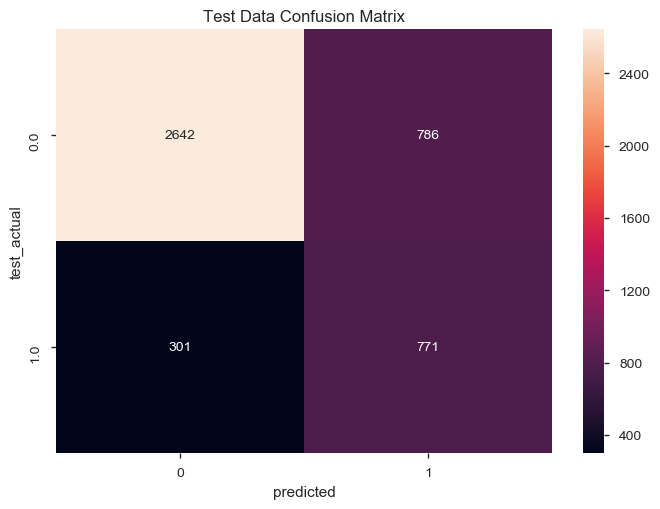

In [337]:
sns.heatmap(pd.crosstab(train_predict['train_actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(test_predict['test_actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()


In [338]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.train_actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.test_actual, test_predict.predicted))

# Accuracy for Train Data = Train_Actual - Train_Predicted (metrics.accuracy_score)


The overall accuracy score for the Train Data is :  0.7656919706638727
The overall accuracy score for the Test Data  is :  0.7584444444444445


In [339]:
print(metrics.classification_report(train_predict.train_actual, train_predict.predicted))

              precision    recall  f1-score   support

         0.0       0.90      0.78      0.84      8000
         1.0       0.51      0.72      0.59      2499

   micro avg       0.77      0.77      0.77     10499
   macro avg       0.70      0.75      0.71     10499
weighted avg       0.81      0.77      0.78     10499



In [340]:
print(metrics.classification_report(test_predict.test_actual, test_predict.predicted))

              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83      3428
         1.0       0.50      0.72      0.59      1072

   micro avg       0.76      0.76      0.76      4500
   macro avg       0.70      0.74      0.71      4500
weighted avg       0.80      0.76      0.77      4500



### DECILE ANALYSIS

In [341]:
#Decile analysis for validation of models - Business validation

In [342]:
train_predict['Deciles']=pd.qcut(train_predict['train_prob'],10, labels=False)

In [343]:
train_predict.head()

,train_actual,train_prob,predicted,tp,fp,tn,fn,Deciles
12602,1.0,0.664411,1,1.0,0.0,0.0,0.0,9
4889,0.0,0.033652,0,0.0,0.0,1.0,0.0,0
1572,1.0,0.504105,1,1.0,0.0,0.0,0.0,8
13375,0.0,0.041230,0,0.0,0.0,1.0,0.0,1
879,1.0,0.115837,0,0.0,0.0,0.0,1.0,3


In [344]:
test_predict['Deciles']=pd.qcut(test_predict['test_prob'],10, labels=False)

test_predict.head()

,test_actual,test_prob,predicted,Deciles
6723,0.0,0.023797,0,0
6473,0.0,0.091275,0,2
4679,0.0,0.235997,0,6
862,1.0,0.481802,1,8
7286,0.0,0.019170,0,0


#### Decile Analysis for train data

In [345]:
no_1s = train_predict[['Deciles','train_actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['train_actual']
no_total = train_predict[['Deciles','train_actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['train_actual']
max_prob = train_predict[['Deciles','train_prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['train_prob']
min_prob = train_predict[['Deciles','train_prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['train_prob']

In [346]:
Decile_analysis_train = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

In [347]:
Decile_analysis_train.columns = ["Max_Prob","Min_Prob","# of 1's","# of 0's", "Total"]

In [348]:
Decile_analysis_train
# No.of 1's should be more in numbers in the higher Deciles and lower in the lower deciles (Should be present in Descending order)
# No.of 0's should be less in the higher deciles and more in the lower deciles (Increasing order)

,Max_Prob,Min_Prob,# of 1's,# of 0's,Total
Deciles,,,,,
9,0.918615,0.550901,590.0,459.0,1049
8,0.550760,0.423084,672.0,379.0,1051
7,0.423021,0.297590,360.0,690.0,1050
6,0.297584,0.224270,328.0,722.0,1050
5,0.224201,0.166476,164.0,885.0,1049
4,0.166384,0.127556,164.0,886.0,1050
3,0.127517,0.092377,119.0,931.0,1050
2,0.092338,0.064401,58.0,992.0,1050
1,0.064397,0.037621,20.0,1030.0,1050


In [350]:
Decile_analysis_train.to_csv("DecileAnalysisTrain.csv")

#### Decile Analysis for Test data

In [349]:


no_1s = test_predict[['Deciles','test_actual']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)['test_actual']
no_total = test_predict[['Deciles','test_actual']].groupby(test_predict.Deciles).count().sort_index(ascending=False)['test_actual']
max_prob = test_predict[['Deciles','test_prob']].groupby(test_predict.Deciles).max().sort_index(ascending=False)['test_prob']
min_prob = test_predict[['Deciles','test_prob']].groupby(test_predict.Deciles).min().sort_index(ascending=False)['test_prob']

Decile_analysis_test = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)
Decile_analysis_test.columns = ["Max_Prob","Min_Prob","# of 1's","# of 0's","Total"]

Decile_analysis_test

# No.of 1's should be more in numbers in the higher Deciles and lower in the lower deciles (Should be present in Descending order)
# No.of 0's should be less in the higher deciles and more in the lower deciles (Increasing order)

,Max_Prob,Min_Prob,# of 1's,# of 0's,Total
Deciles,,,,,
9,0.893833,0.544841,236.0,213.0,449
8,0.544720,0.416595,306.0,145.0,451
7,0.415156,0.304718,153.0,297.0,450
6,0.304606,0.229121,140.0,310.0,450
5,0.228936,0.171630,79.0,371.0,450
4,0.171308,0.130686,68.0,382.0,450
3,0.130667,0.094837,45.0,405.0,450
2,0.094830,0.066152,24.0,426.0,450
1,0.066129,0.038947,11.0,439.0,450


In [351]:
Decile_analysis_test.to_csv("DecileAnalysisTest.csv")

### Thus, the Model is Getting Validated.

### Decision Trees

In [373]:
list_vars

['Work_accident',
 'average_montly_hours',
 'last_evaluation',
 'number_project',
 'promotion_last_5years',
 'salary_low',
 'satisfaction_level',
 'time_spend_company']

In [381]:
X = data1[list_vars]
y = data1['left']

In [382]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [383]:
train_X.shape

(10499, 8)

In [384]:
train_y.shape

(10499,)

In [385]:
test_X.shape

(4500, 8)

In [386]:
test_y.shape

(4500,)

In [387]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier,export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [388]:
clf_tree = DecisionTreeClassifier( max_depth = 3 )
clf_tree=clf_tree.fit( train_X, train_y )

In [389]:
pd.DataFrame(clf_tree.predict_proba(train_X)).head()

,0,1
0,0.000000,1.000000
1,0.986419,0.013581
2,0.052632,0.947368
3,0.986419,0.013581
4,0.281360,0.718640


In [390]:
pd.DataFrame(clf_tree.predict_proba(train_X))[1]

0        1.000000
1        0.013581
2        0.947368
3        0.013581
4        0.718640
5        1.000000
6        0.013581
7        0.947368
8        0.947368
9        0.013581
10       0.013581
11       0.075772
12       0.947368
13       0.013581
14       1.000000
15       0.075772
16       0.013581
17       0.013581
18       0.013581
19       0.718640
20       0.013581
21       0.041667
22       0.031657
23       0.013581
24       0.013581
25       0.013581
26       0.013581
27       0.031657
28       0.013581
29       1.000000
           ...   
10469    0.013581
10470    0.013581
10471    0.947368
10472    0.013581
10473    0.013581
10474    0.013581
10475    0.013581
10476    0.013581
10477    0.718640
10478    0.013581
10479    0.947368
10480    0.718640
10481    0.013581
10482    0.013581
10483    0.013581
10484    0.075772
10485    0.718640
10486    0.013581
10487    0.013581
10488    0.013581
10489    0.947368
10490    0.013581
10491    0.013581
10492    0.031657
10493    0

In [391]:
pred = pd.DataFrame(clf_tree.predict( train_X ), index=train_X.index)

In [392]:
tree_train_pred = pd.concat([train_y, pred], axis=1)

In [393]:
tree_train_pred.columns = ['actual', 'predicted']

In [394]:
tree_train_pred.head()

,actual,predicted
12602,1.0,1.0
4889,0.0,0.0
1572,1.0,1.0
13375,0.0,0.0
879,1.0,1.0


In [395]:
pred_test = pd.DataFrame(clf_tree.predict( test_X ), index=test_X.index)
tree_test_pred = pd.concat([test_y, pred_test], axis=1)
tree_test_pred.columns = ['actual', 'predicted']
tree_test_pred.head()

,actual,predicted
6723,0.0,0.0
6473,0.0,0.0
4679,0.0,0.0
862,1.0,1.0
7286,0.0,0.0


In [396]:
print("Train Accuracy:")
print(metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted ))

print("Test Accuracy:")
print(metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted ))

Train Accuracy:
0.9538051242975522
Test Accuracy:
0.9486666666666667


Text(0.5, 28.3611111111111, 'Predicted label')

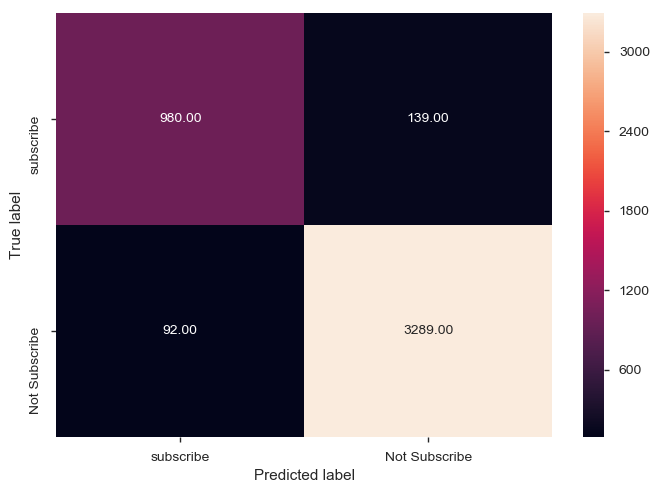

In [397]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["subscribe", "Not Subscribe"] , yticklabels = ["subscribe", "Not Subscribe"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [398]:
#How good the model is?
predict_proba_df = pd.DataFrame( clf_tree.predict_proba( train_X ) )

predict_proba_df.columns= ['P_no', 'P_yes']

predict_proba_df.head()

,P_no,P_yes
0,0.000000,1.000000
1,0.986419,0.013581
2,0.052632,0.947368
3,0.986419,0.013581
4,0.281360,0.718640


In [399]:
metrics.roc_auc_score(train_y,predict_proba_df.P_yes )

0.9672748099239696

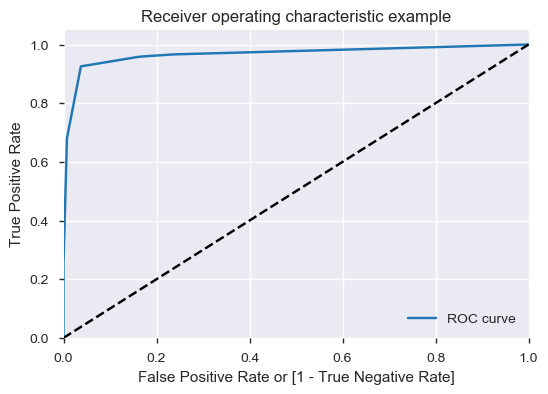

In [400]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( train_y,
                                     predict_proba_df.P_yes,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve' )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Tuning the Parameters

In [401]:
param_grid = {'max_depth': np.arange(3, 6),
             'max_features': np.arange(3,8)}

In [402]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( train_X, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([3, 4, 5]), 'max_features': array([3, 4, 5, 6, 7])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [403]:
tree.best_score_

0.9718068387465473

In [404]:
tree.best_params_

{'max_depth': 5, 'max_features': 6}

In [405]:
clf_tree = DecisionTreeClassifier(max_depth = 5, max_features=6)

In [406]:
clf_tree.fit(train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [407]:
print(metrics.classification_report(train_y, clf_tree.predict(train_X)))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      8000
         1.0       0.97      0.93      0.95      2499

   micro avg       0.98      0.98      0.98     10499
   macro avg       0.97      0.96      0.97     10499
weighted avg       0.98      0.98      0.98     10499



In [408]:
print(metrics.classification_report(test_y, clf_tree.predict(test_X)))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      3428
         1.0       0.96      0.91      0.93      1072

   micro avg       0.97      0.97      0.97      4500
   macro avg       0.97      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



### Feature Relative Importance (From Decision Tree)

In [409]:
clf_tree.feature_importances_

array([0.        , 0.17368084, 0.13829682, 0.09711432, 0.        ,
       0.        , 0.41505   , 0.17585802])

In [410]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(train_X.columns, clf_tree.feature_importances_)]

feature_map

[('Work_accident', 0.0),
 ('average_montly_hours', 0.17368084128622405),
 ('last_evaluation', 0.1382968188019206),
 ('number_project', 0.09711432153622197),
 ('promotion_last_5years', 0.0),
 ('salary_low', 0.0),
 ('satisfaction_level', 0.4150499977106217),
 ('time_spend_company', 0.17585802066501177)]

In [411]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance

,Feature,importance
6,satisfaction_level,0.415050
7,time_spend_company,0.175858
1,average_montly_hours,0.173681
2,last_evaluation,0.138297
3,number_project,0.097114
0,Work_accident,0.000000
4,promotion_last_5years,0.000000
5,salary_low,0.000000


In [412]:
metrics.accuracy_score( test_y, clf_tree.predict(test_X) )

0.9691111111111111

Text(0.5, 28.3611111111111, 'Predicted label')

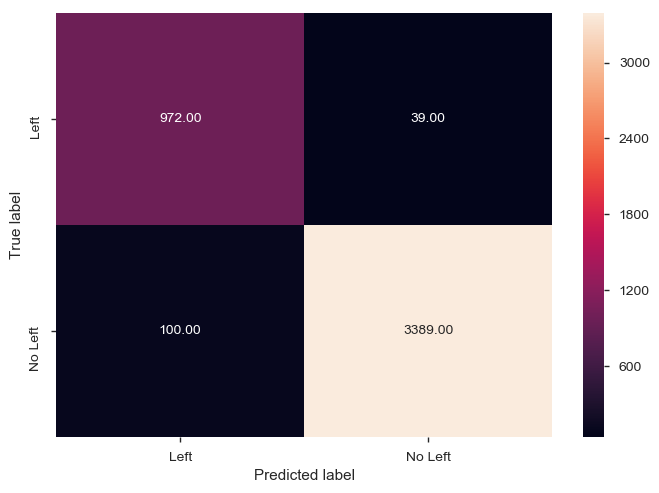

In [413]:
tree_cm = metrics.confusion_matrix( clf_tree.predict(test_X),
                                 test_y,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Random Forest

In [414]:
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_features=7, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [415]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.9875555555555555

Text(0.5, 28.3611111111111, 'Predicted label')

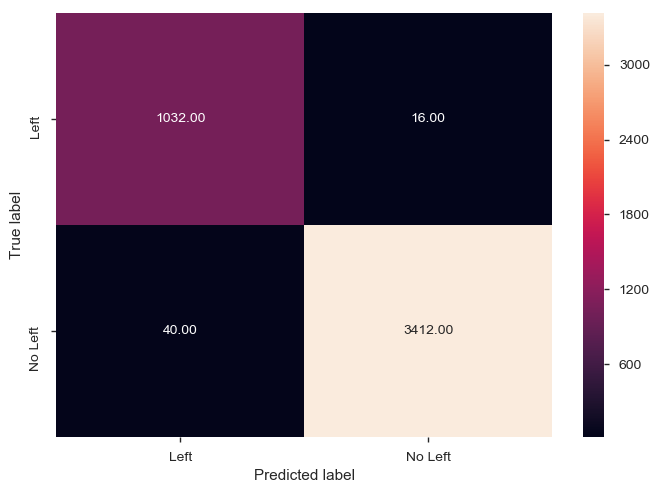

In [416]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Feature Importance (From Random Forest)

In [417]:
radm_clf.feature_importances_
indices = np.argsort(radm_clf.feature_importances_)[::-1]

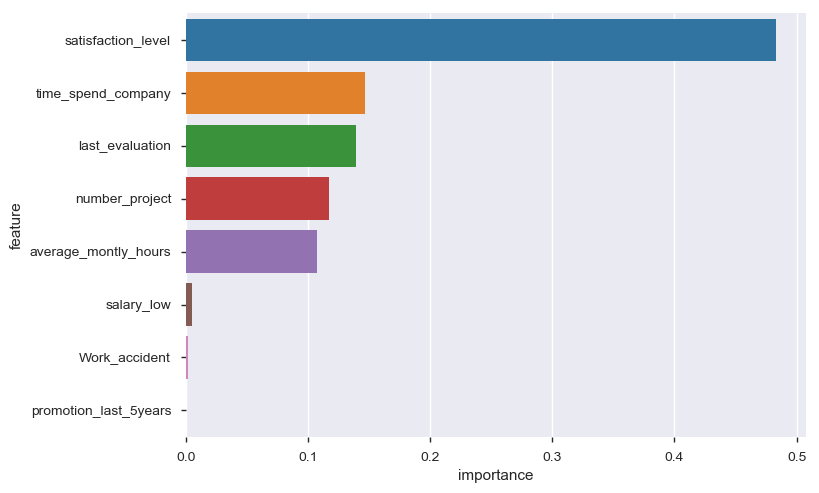

In [419]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
    feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

#### Tuning the Parameters

In [421]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100,120,150],
                'max_features': [5,6,7,8]}

from sklearn.model_selection import GridSearchCV
gscv_Rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [422]:
gscv_results = gscv_Rf.fit(train_X, train_y)
gscv_results.best_score_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   57.4s finished


0.9897133060291456

In [423]:
gscv_results.best_params_

{'max_features': 5, 'n_estimators': 80}

### XGBoost

In [424]:
from xgboost import XGBClassifier

In [425]:
#All Columns
xgb_estimator = XGBClassifier(n_estimators=200,
                         random_state = 42,
                        n_jobs=-1,
                        verbose=1)

In [426]:
xgb_estimator.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, verbose=1)

In [427]:
xgb_estimator.predict(train_X)

array([1., 0., 1., ..., 0., 1., 0.])

In [428]:
metrics.roc_auc_score(train_y,pd.DataFrame(xgb_estimator.predict_proba(train_X))[1])

0.9924039865946379

In [429]:
metrics.roc_auc_score(test_y,pd.DataFrame(xgb_estimator.predict_proba(test_X))[1])

0.9890601325345268

In [430]:
print(metrics.classification_report(train_y, xgb_estimator.predict(train_X)))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      8000
         1.0       0.98      0.94      0.96      2499

   micro avg       0.98      0.98      0.98     10499
   macro avg       0.98      0.96      0.97     10499
weighted avg       0.98      0.98      0.98     10499



In [431]:
print(metrics.classification_report(test_y, xgb_estimator.predict(test_X)))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      3428
         1.0       0.96      0.92      0.94      1072

   micro avg       0.97      0.97      0.97      4500
   macro avg       0.97      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



#### Tuning the Parameters

In [432]:
paramgrid = {'n_estimators' : [100,150,200,250,300,500,800,1000],
            'max_depth' : [3,4,5,6],
            'learning_rate' : [0.01,0.001,0.02] }

In [433]:
xgb_estimator1 =GridSearchCV(estimator=XGBClassifier(),
                            param_grid = paramgrid,
                            cv = 5,
                            n_jobs = -1,verbose=True)

In [434]:
xgb_estimator1.fit(train_X, train_y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 500, 800, 1000], 'max_depth': [3, 4, 5, 6], 'learning_rate': [0.01, 0.001, 0.02]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [435]:
xgb_estimator1.best_params_

{'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 1000}

In [436]:
xgb_estimator1.best_score_

0.9834269930469568

In [438]:
xgb_final = XGBClassifier(n_estimators=1000,max_depth=6,learning_rate=0.02,n_jobs=-1,verbose=True)

In [439]:
xgb_final.fit(train_X,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, verbose=True)

In [440]:
print(metrics.roc_auc_score(train_y,pd.DataFrame(xgb_final.predict_proba(train_X))[1]))

0.9995014005602241


In [441]:
print(metrics.roc_auc_score(test_y,pd.DataFrame(xgb_final.predict_proba(test_X))[1]))

0.9923797545237639


In [442]:
print(metrics.classification_report(train_y, xgb_final.predict(train_X)))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      8000
         1.0       1.00      0.97      0.98      2499

   micro avg       0.99      0.99      0.99     10499
   macro avg       0.99      0.99      0.99     10499
weighted avg       0.99      0.99      0.99     10499



In [443]:
print(metrics.classification_report(test_y, xgb_final.predict(test_X)))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3428
         1.0       0.99      0.94      0.96      1072

   micro avg       0.98      0.98      0.98      4500
   macro avg       0.98      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500



### Naive Bayes

In [444]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [445]:
nb_clf = GaussianNB()
nb_clf.fit(train_X, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

Text(0.5, 28.3611111111111, 'Predicted label')

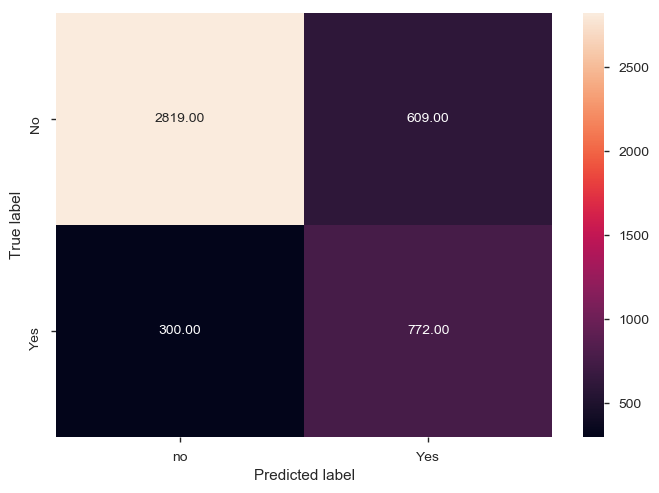

In [446]:
nb_cm = metrics.confusion_matrix( test_y,nb_clf.predict( test_X) )
sns.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [447]:
metrics.accuracy_score( test_y, nb_clf.predict( test_X ) )

0.798

### KNN

In [452]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [453]:
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11]}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')

In [454]:
knn_clf.fit(train_X, train_y)

knn_clf.best_score_

0.9487570244785217

In [455]:
knn_clf.best_params_

{'n_neighbors': 3}

In [456]:
#Building for the n_neighbors=3
knn_clf = KNeighborsClassifier( n_neighbors =3 )

In [457]:
knn_clf.fit( train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [458]:
knn_cm = metrics.confusion_matrix(test_y, knn_clf.predict( test_X ) )

Text(0.5, 28.3611111111111, 'Predicted label')

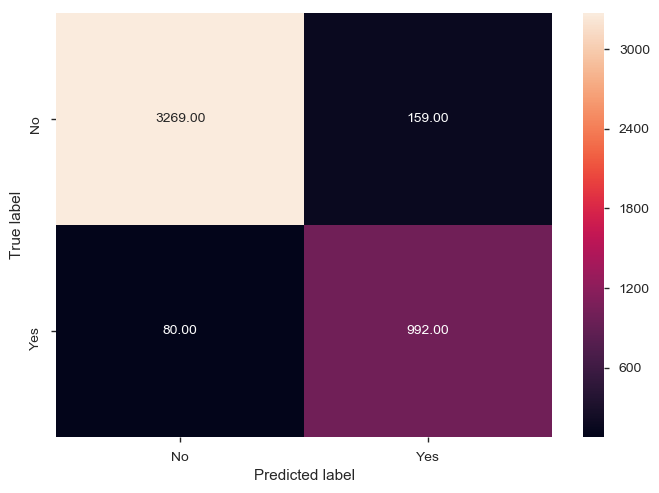

In [459]:
sns.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [460]:
metrics.accuracy_score( test_y, knn_clf.predict( test_X ) )

0.9468888888888889

In [462]:
print(metrics.classification_report(test_y,knn_clf.predict(test_X)))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      3428
         1.0       0.86      0.93      0.89      1072

   micro avg       0.95      0.95      0.95      4500
   macro avg       0.92      0.94      0.93      4500
weighted avg       0.95      0.95      0.95      4500

